In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from datetime import date
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
%matplotlib inline
plt.style.use('seaborn')

In [41]:
dtset = pd.read_csv("../data/avia_painac_1_Data.csv", sep=',', 
                    encoding = "ISO-8859-1", low_memory= False)

In [42]:
#Understanding the data
dt1 = dtset[(dtset['TRA_MEAS'] != 'Passengers on board')]
dt2 = dt1[(dt1['Value'] != ':')]

In [43]:
dtset.drop(dtset[dtset.Value == ':'].index, inplace=True)
dtset.drop(dtset[dtset.UNIT == 'Flight'].index, inplace=True)
dtset.drop('UNIT', axis= 1, inplace=True)
dtset.drop('Flag and Footnotes', axis= 1, inplace=True)
dtset['NEWTIME'] = dtset["TIME"].apply(lambda x: x.split('M'))

In [45]:
dtset['YEAR'] = dtset.NEWTIME.apply(lambda x: x[0])
dtset['MONTH'] = dtset.NEWTIME.apply(lambda x: x[1])
dtset['DATE'] = dtset.NEWTIME.apply(lambda x: str(x[0]) + '-' + str(x[1]) + '-' + '01' )

In [47]:
dtset['DATE'] = pd.to_datetime(dtset['DATE'])

In [48]:
dtset.drop('TIME', axis= 1, inplace=True)
dtset.drop('NEWTIME', axis= 1, inplace=True)

In [49]:
dtset.drop('PARTNER', axis= 1, inplace=True)

In [50]:
dtset['MONTH'] = pd.to_numeric(dtset['MONTH'])
dtset['YEAR'] = pd.to_numeric(dtset['YEAR'])


In [51]:
dtset[(dtset['Value'] == '26,796')]

,REP_AIRP,TRA_MEAS,Value,YEAR,MONTH,DATE
384,BRUSSELS airport,Passengers on board,"26,796",2015,1,2015-01-01
387,BRUSSELS airport,Passengers carried,"26,796",2015,1,2015-01-01


In [52]:
dtset.ix[384]

C:\Users\Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


REP_AIRP       BRUSSELS airport
TRA_MEAS    Passengers on board
Value                    26,796
YEAR                       2015
MONTH                         1
DATE        2015-01-01 00:00:00
Name: 384, dtype: object

In [53]:
dtset['Value'] = dtset['Value'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [54]:
dtset.dtypes

REP_AIRP            object
TRA_MEAS            object
Value                int64
YEAR                 int64
MONTH                int64
DATE        datetime64[ns]
dtype: object

In [55]:
dtsetCarried = dtset[(dtset['TRA_MEAS'] == 'Passengers carried' )]
dtsetBoard = dtset[(dtset['TRA_MEAS'] == 'Passengers on board' )]
dtsetArrivals = dtset[(dtset['TRA_MEAS'] == 'Passengers on board (arrivals)' )]
dtsetDepartures = dtset[(dtset['TRA_MEAS'] == 'Passengers on board (departures)' )]

In [56]:
dtsetBoard.columns

Index(['REP_AIRP', 'TRA_MEAS', 'Value', 'YEAR', 'MONTH', 'DATE'], dtype='object')

In [57]:
dtsetBoard = dtsetBoard[['YEAR','Value']]

In [58]:
dtsetBoard = dtsetBoard.groupby('YEAR').sum()

In [59]:
dtsetBoard.dtypes

Value    int64
dtype: object

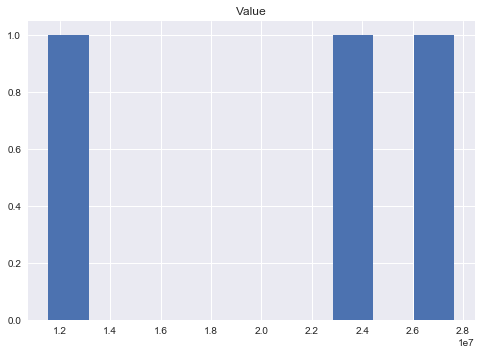

In [60]:
dtsetBoard.hist('Value', bins=10);

## Data about arriveds in Dublin

In [61]:
dtsetArrivalsn = dtsetArrivals[['YEAR', 'MONTH', 'Value']]

In [62]:
dtsetArrivalsn = dtsetArrivalsn.groupby(['YEAR','MONTH'])['Value'].sum()

In [63]:
dtsetArrivalsn = pd.DataFrame(dtsetArrivalsn)

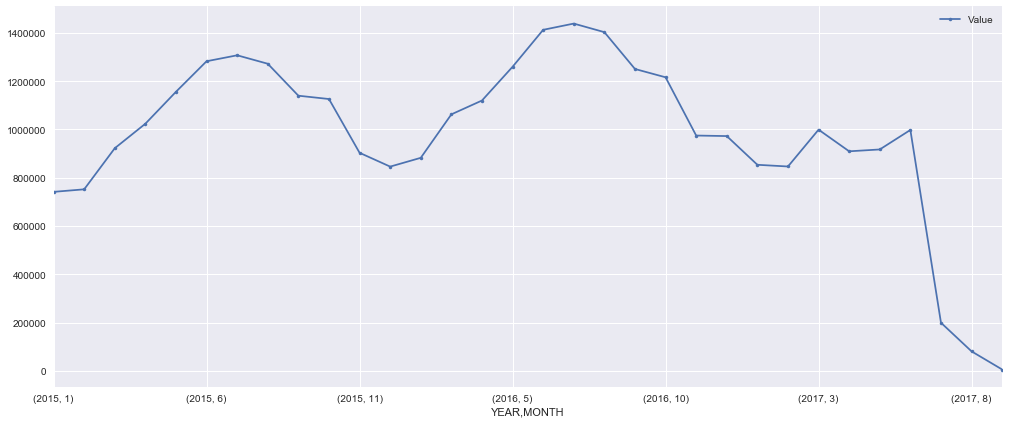

In [353]:
dtsetArrivalsn.plot( style=".-", figsize=(17,7));

In [65]:
dtf = dtsetArrivalsn.pivot_table(columns='YEAR', index='MONTH')
dtf.fillna(0, inplace=True)
X2 = PCA(2, svd_solver="full").fit_transform(dtf)
gmm = GaussianMixture(2)
gmm.fit(dtf)
labels = gmm.predict(dtf)

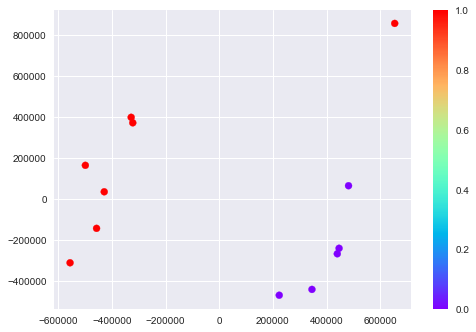

In [66]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap ="rainbow")
plt.colorbar();

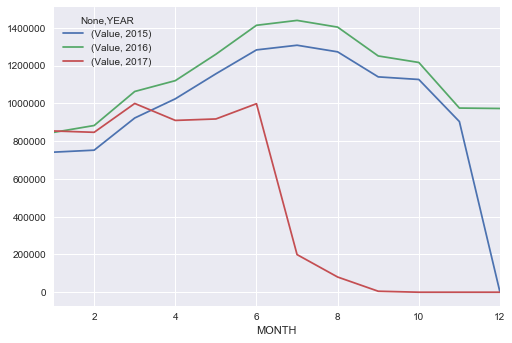

In [67]:
dtf.plot();

In [73]:
dtsetArrivals.columns

Index(['REP_AIRP', 'TRA_MEAS', 'Value', 'YEAR', 'MONTH', 'DATE'], dtype='object')

In [373]:
dtsetArrivalsC = dtsetArrivals[['YEAR','Value']]
dtsetArrivalsD = dtsetArrivals[['DATE','Value']]
dtsetDepD = dtsetDepartures[['DATE','Value']]

In [374]:
grouped = dtsetArrivalsD.groupby(['DATE']).sum()
groupedDD = dtsetDepD.groupby(['DATE']).sum()
grouped['Media'] = dtsetArrivalsD.groupby(['DATE']).mean()

In [251]:
grouped

,Value,Media
DATE,,
2015-01-01,741526,7566.591837
2015-02-01,752009,7230.855769
2015-03-01,922353,7750.865546
2015-04-01,1023970,8126.746032
2015-05-01,1156314,8259.385714
2015-06-01,1282909,8909.090278
2015-07-01,1307567,8895.013605
2015-08-01,1272554,9025.205674
2015-09-01,1140054,7972.405594


In [247]:
dtsetArrivalsD.set_index('DATE', inplace=True)

In [248]:
labels = dtsetArrivalsD.index.month.values

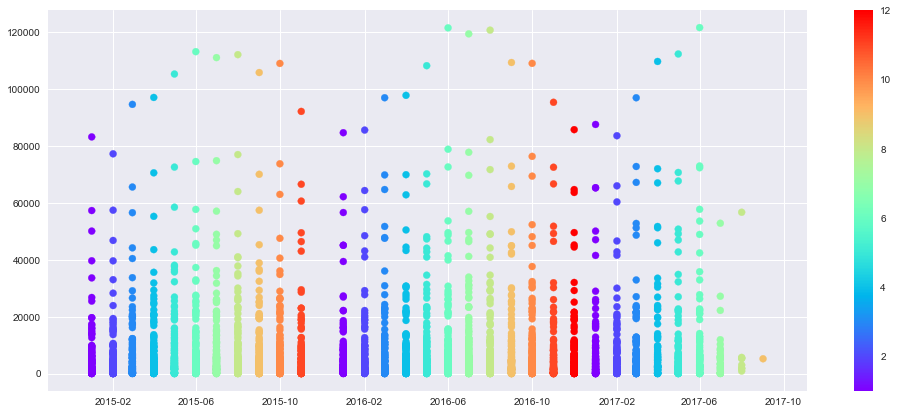

In [249]:
plt.figure(figsize=(17,7))
plt.scatter (dtsetArrivalsD.index.values, dtsetArrivalsD.Value, c=labels, cmap ="rainbow")
plt.colorbar()
plt.show()

In [250]:
grouped.shape

(32, 2)

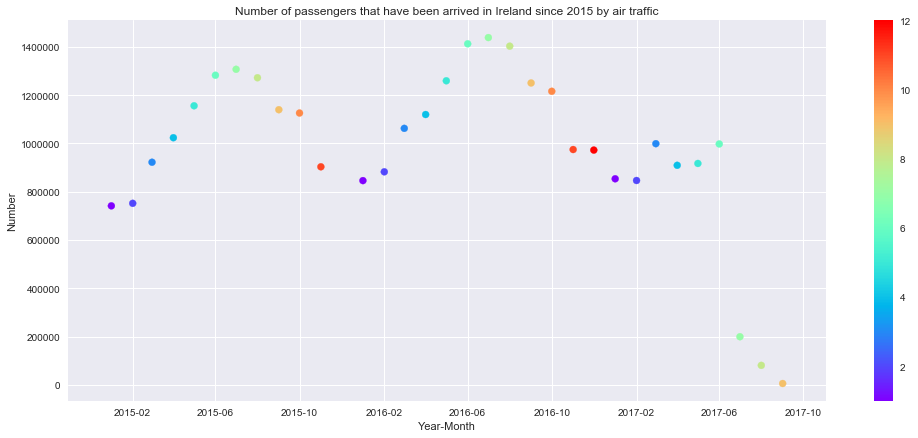

In [376]:
labelsg = grouped.index.month.values
plt.figure(figsize=(17,7))
plt.scatter (grouped.index.values, grouped.Value, c=labelsg, cmap ="rainbow" )
#plt.scatter(groupedDD.index.values, groupedDD.Value, c=labelsg, cmap = "rainbow")
plt.title('Number of passengers that have been arrived in Ireland since 2015 by air traffic')
plt.xlabel('Year-Month')
plt.ylabel('Number')
plt.colorbar()
plt.show()

In [254]:
from sklearn.linear_model import LinearRegression as LinReg

In [312]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['Value']

In [326]:
import datetime

In [321]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [337]:
reg = LinReg()
reg.fit(x_train,y_train)
y_preds = reg.predict(x_train.astype(float))
#print("Accuracy: " + str(reg.score(x,y)))


In [347]:
r2_train = reg.score(x_train.astype(float), y_train)
r2_test = reg.score(x_test.astype(float), y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.11
R2 no set de teste: 0.13


In [344]:
reg.predict(2018)

array([ 6749432.2592813])

In [338]:
reg.coef_

array([ -3.91864879e-12])

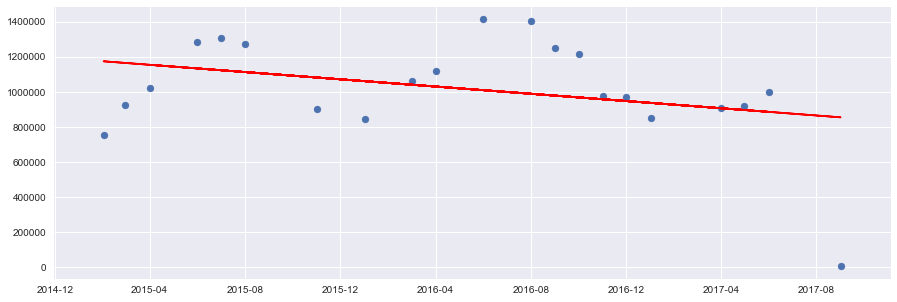

In [341]:
x1 = x_train
y1 = y_preds
plt.figure(figsize=(15,5))
plt.scatter(x = x_train, y = y_train)
plt.plot(x1, y1, c = "r")
plt.show();

In [380]:
dt = dtsetArrivals.groupby(['REP_AIRP'])['Value'].sum()

In [381]:
dt.shape

(227,)

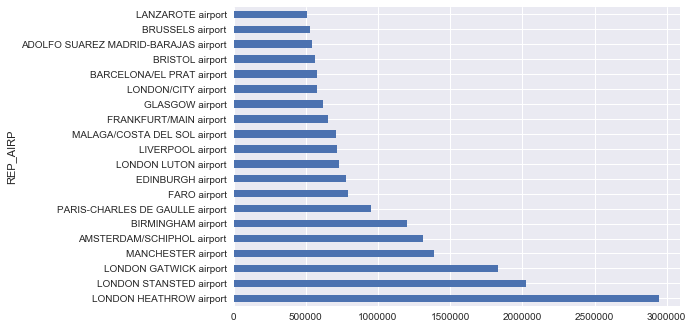

In [386]:
dt.sort_values(ascending=False).head(20).plot(kind = 'barh');

In [28]:
#dtsetArrivalsC = dtsetArrivalsC.groupby(['REP_AIRP','YEAR','MONTH'])['Value'].sum()

In [29]:
#dtsetArrivalsC = pd.DataFrame(dtsetArrivalsC)

In [30]:
#dtt = dtsetArrivalsC.pivot_table(columns=['YEAR', 'MONTH'], index='REP_AIRP')

In [31]:
#dtsetArrivalsC

Value
REP_AIRP                            YEAR MONTH       
AALBORG airport                     2015 2          2
                                         8          8
                                    2016 3          2
                                         4          7
                                         8          4
ABERDEEN/DYCE airport               2015 1       1589
                                         2       1427
                                         3       1685
                                         4       1732
                                         5       1880
                                         6       1986
                                         7       1936
                                         8       1837
                                         9       1725
                                         10      1674
                                         11      1612
                                    2016 1       1659
                                         2       1594
                                         3       1733
                                         4       1619
                                         5       1674
                                         6       1619
                                         7       1789
                                         8       1855
                                         9       1650
                                         10      1673
                                         11      1516
                                         12      1325
                                    2017 1       1475
                                         2       1332
...                                               ...
ZADAR/ZEMUNIK airport               2015 10      1796
                                         11       124
                                    2016 4       2199
                                         5       2345
                                         6       2349
                                         7       2405
                                         8       2489
                                         9       2306
                                         10      2137
                                         11       410
                                    2017 3        538
                                         4       2178
                                         5       2535
                                         6       2747
                                         7       3490
                                         8       2984
ZAGREB/PLESO airport                2015 3        173
                                         5         74
                                    2016 9        209
                                         11       120
ZAKINTHOS/DIONISIOS SOLOMOS airport 2015 5        188
                                         6        895
                                         7        744
                                         8        694
                                         9        710
                                    2016 5        377
                                         6        732
                                         7        750
                                         8        927
                                         9        520

[3571 rows x 1 columns]

In [ ]:
dtts[dtts.YEAR == 2017]

In [ ]:
dtts = dtts.loc[dtts.columns==2017];

In [ ]:
dtts

In [ ]:
dtt.fillna(0, inplace=True)
X3 = PCA(2, svd_solver="full").fit_transform(dtt)
gmm = GaussianMixture(2)
gmm.fit(dtt)
labelsd = gmm.predict(dtt['Value'])

In [ ]:
plt.scatter(X3[:,0], X3[:,1], c=labelsd, cmap ="rainbow")
plt.colorbar();

In [ ]:
dtt[(labelsd == 1)]

In [ ]:
dtt[(labelsd == 0)]

In [ ]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap ="rainbow")
plt.colorbar();